<a href="https://colab.research.google.com/github/NguyenTanPhats/baitap2_AI/blob/main/BaitapFuzzy_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=2ba710544a460fdd7dd189819cc911da8a2f569324b01fa81a129c7a98a9d58c
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


749.9999999999925


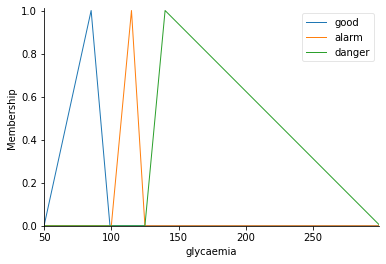

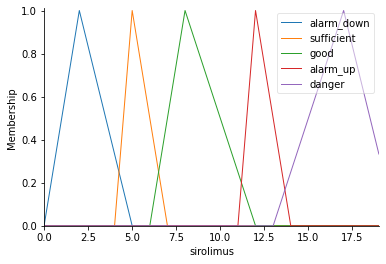

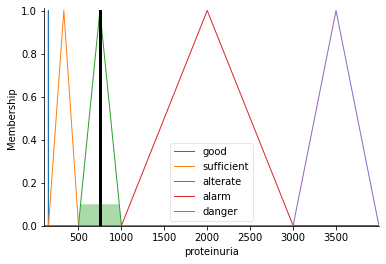

In [99]:
#Case study 1
# ProtFIS
import numpy as np
import skfuzzy as fuzz
from skfuzzy import  control as ctrl
     
sirolimus = ctrl.Antecedent(np.arange(0, 20, 1), 'sirolimus')
glycaemia = ctrl.Antecedent(np.arange(50, 300, 1), 'glycaemia')
proteinuria = ctrl.Consequent(np.arange(100,4000, 1), 'proteinuria')


sirolimus['alarm_down'] = fuzz.trimf(sirolimus.universe, [0, 2, 5])
sirolimus['sufficient'] = fuzz.trimf(sirolimus.universe, [4.5, 5, 7])
sirolimus['good'] = fuzz.trimf(sirolimus.universe, [6, 8, 12])
sirolimus['alarm_up'] = fuzz.trimf(sirolimus.universe, [11, 12, 14])
sirolimus['danger'] = fuzz.trimf(sirolimus.universe, [13, 17, 20])


glycaemia['good'] = fuzz.trimf(glycaemia.universe, [50, 85, 99])
glycaemia['alarm'] = fuzz.trimf(glycaemia.universe, [100, 115, 125])
glycaemia['danger'] = fuzz.trimf(glycaemia.universe, [125, 140, 300])


proteinuria['good'] = fuzz.trimf(proteinuria.universe, [150, 150, 150])
proteinuria['sufficient'] = fuzz.trimf(proteinuria.universe, [151, 330, 500])
proteinuria['alterate'] = fuzz.trimf(proteinuria.universe, [500, 750, 1000])
proteinuria['alarm'] = fuzz.trimf(proteinuria.universe, [1000, 2000, 3000])
proteinuria['danger'] = fuzz.trimf(proteinuria.universe, [3000, 3500,4000])


rule1 = ctrl.Rule(glycaemia['good'] & sirolimus['good'],proteinuria['good'])
rule2 = ctrl.Rule(glycaemia['danger'] & sirolimus['danger'],proteinuria['danger'])
rule3 = ctrl.Rule(glycaemia['good'] & sirolimus['sufficient'],proteinuria['sufficient'])
rule4 = ctrl.Rule(glycaemia['alarm'] & sirolimus['alarm_up'],proteinuria['alarm'])
rule5 = ctrl.Rule(glycaemia['alarm'] & sirolimus['sufficient'],proteinuria['alterate'])
rule6 = ctrl.Rule(glycaemia['good'] & sirolimus['alarm_up'],proteinuria['alterate'])
rule7 = ctrl.Rule(glycaemia['alarm'] & sirolimus['good'],proteinuria['sufficient'])
rule8 = ctrl.Rule(glycaemia['good'] & sirolimus['alarm_down'],proteinuria['sufficient'])
rule9 = ctrl.Rule(glycaemia['danger'] & sirolimus['sufficient'],proteinuria['alarm'])
rule10 = ctrl.Rule(glycaemia['danger'] & sirolimus['good'],proteinuria['alarm'])
rule11 = ctrl.Rule(glycaemia['danger'] & sirolimus['alarm_up'],proteinuria['danger'])

glycaemia.view()
sirolimus.view()

proteinuria_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11])
protein = ctrl.ControlSystemSimulation( proteinuria_ctrl)

protein.input['glycaemia'] = 120
protein.input['sirolimus'] = 4.1
protein.compute()
result = protein.output['proteinuria']

print(protein.output['proteinuria'])
proteinuria.view(sim=protein)


75.0


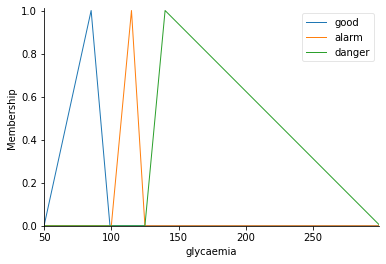

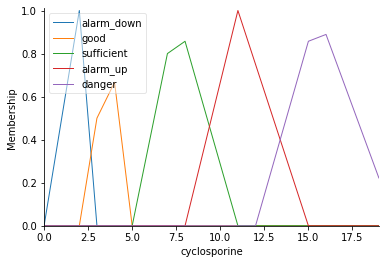

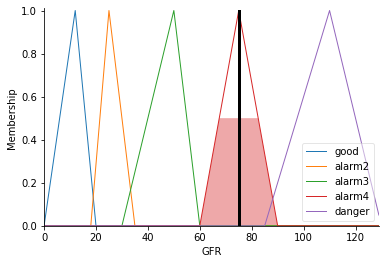

In [98]:
#Case study 1 
#GfrFIS
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


cyclosporine = ctrl.Antecedent(np.arange(0, 20, 1), 'cyclosporine')
glycaemia = ctrl.Antecedent(np.arange(50, 300, 1), 'glycaemia')
GFR = ctrl.Consequent(np.arange(0, 130, 1), 'GFR')


cyclosporine['alarm_down'] = fuzz.trimf(cyclosporine.universe, [0,2,3])
cyclosporine['good'] = fuzz.trimf(cyclosporine.universe, [2.5,3.5,5])
cyclosporine['sufficient'] = fuzz.trimf(cyclosporine.universe, [5,7.5,11])
cyclosporine['alarm_up'] = fuzz.trimf(cyclosporine.universe, [8,11,15])
cyclosporine['danger'] = fuzz.trimf(cyclosporine.universe, [12,15.5,20])


glycaemia['good'] = fuzz.trimf(glycaemia.universe, [50, 85, 99])
glycaemia['alarm'] = fuzz.trimf(glycaemia.universe, [100, 115, 125])
glycaemia['danger'] = fuzz.trimf(glycaemia.universe, [125, 140, 300])



GFR['good'] = fuzz.trimf(GFR.universe, [0, 12, 20])
GFR['alarm2'] = fuzz.trimf(GFR.universe, [18, 25, 35])
GFR['alarm3'] = fuzz.trimf(GFR.universe, [30, 50, 60])
GFR['alarm4'] = fuzz.trimf(GFR.universe, [60, 75, 90])
GFR['danger'] = fuzz.trimf(GFR.universe, [85, 110, 130])

rule1 = ctrl.Rule(glycaemia['danger'] & cyclosporine['danger'], GFR['danger'])
rule2 = ctrl.Rule(glycaemia['good'] & cyclosporine['danger'], GFR['alarm3'])
rule3 = ctrl.Rule(glycaemia['alarm'] & cyclosporine['alarm_up'], GFR['alarm4'])
rule4 = ctrl.Rule(glycaemia['good'] & cyclosporine['sufficient'], GFR['alarm2'])
rule5 = ctrl.Rule(glycaemia['good'] & cyclosporine['good'], GFR['good'])
rule6 = ctrl.Rule(glycaemia['alarm'] & cyclosporine['good'], GFR['alarm2'])
rule7 = ctrl.Rule(glycaemia['danger'] & cyclosporine['good'], GFR['alarm3'])
rule8 = ctrl.Rule(glycaemia['alarm'] & cyclosporine['danger'], GFR['alarm4'])

glycaemia.view()
cyclosporine.view()


gfr_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
gfr = ctrl.ControlSystemSimulation(gfr_ctrl)
gfr.input['glycaemia'] = 120
gfr.input['cyclosporine'] = 10
gfr.compute()
print(gfr.output['GFR']) 
GFR.view(sim=gfr)

4.6


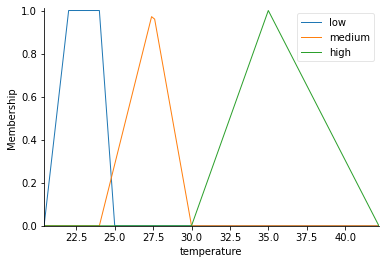

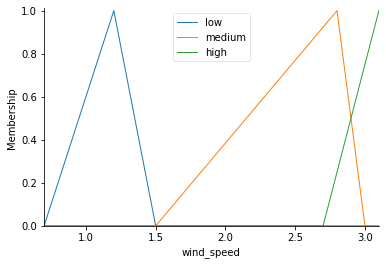

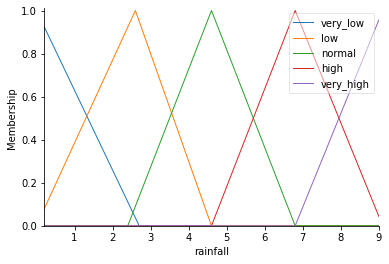

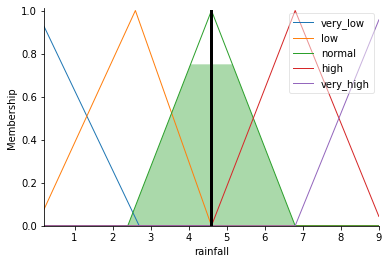

In [108]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

wind_speed = ctrl.Antecedent(np.arange(0.7, 3.1, 0.1), 'wind_speed')
rainfall = ctrl.Consequent(np.arange(0.2, 9.1, 0.1), 'rainfall')       
temperature = ctrl.Antecedent(np.arange(20.4, 42.2, 0.2), 'temperature')  

temperature['low'] = fuzz.trapmf(temperature.universe, [20.4, 22, 24, 25])
temperature['medium'] = fuzz.trimf(temperature.universe, [24, 27.5, 30])
temperature['high'] = fuzz.trimf(temperature.universe, [30, 35, 42.2])

wind_speed['low'] = fuzz.trimf(wind_speed.universe, [0.7, 1.2, 1.5])
wind_speed['medium'] = fuzz.trimf(wind_speed.universe, [1.5, 2.8, 3])
wind_speed['high'] = fuzz.trimf(wind_speed.universe, [2.7, 3.1, 3.1])

rainfall['very_low'] = fuzz.trimf(rainfall.universe, [0, 0, 2.7])
rainfall['low'] = fuzz.trimf(rainfall.universe, [0, 2.6, 4.6])
rainfall['normal'] = fuzz.trimf(rainfall.universe, [2.4, 4.6, 6.8])
rainfall['high'] = fuzz.trimf(rainfall.universe, [4.6, 6.8, 9.1])
rainfall['very_high'] = fuzz.trimf(rainfall.universe, [6.8, 9.1, 9.1])



temperature.view()
wind_speed.view()
rainfall.view()


rule1 = ctrl.Rule(temperature['low'] & wind_speed['low'] , rainfall['very_low'])
rule2 = ctrl.Rule(temperature['low'] & wind_speed['medium'], rainfall['very_low'])
rule3 = ctrl.Rule(temperature['low'] & wind_speed['high'], rainfall['normal'])
rule4 = ctrl.Rule(temperature['medium'] & wind_speed['low'] , rainfall['low'])
rule5 = ctrl.Rule(temperature['medium'] & wind_speed['medium'], rainfall['normal'])
rule6 = ctrl.Rule(temperature['medium'] & wind_speed['high'], rainfall['normal'])
rule7 = ctrl.Rule(temperature['high'] & wind_speed['low'] , rainfall['normal'])
rule8 = ctrl.Rule(temperature['high'] & wind_speed['medium'], rainfall['high'])
rule9 = ctrl.Rule(temperature['high'] & wind_speed['high'], rainfall['very_high'])

rainfalling_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7,rule8, rule9]) 

rainfalling = ctrl.ControlSystemSimulation(rainfalling_ctrl) 


rainfalling.input['temperature'] = 27
rainfalling.input['wind_speed'] = 3

rainfalling.compute()
print(rainfalling.output['rainfall'])
rainfall.view(sim = rainfalling)
